In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # hack---doing this sets the pandas plots to use seaborn styles!

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

The PLUTO dataset used in this analysis and refered to in the file call below is the dataset that comes as a partial result of the work done in the companion `data-munging.ipynb` notebook.

In [4]:
pluto = pd.read_csv('nyc_pluto.csv', index_col=0)

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,20,22,23,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pluto.head(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,Bronx,0.0,8900.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.00,0.0,0.0,2.0,2.000009e+09,0.0,0.0,NaN,NaN,1c,NaN,NaN,NaN,NaN,NaN,NaN,3.0,16v1
1,Bronx,2260.0,1.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,Z9,NaN,0.0,NaN,122 BRUCKNER PARTNERS,15000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,75.00,200.0,0.0,0.0,NaN,0.0,N,3.0,5.0,130500.0,152100.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1005957.0,232162.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
2,Bronx,2260.0,4.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,G5,7.0,0.0,NaN,24 INDIAN HEAD HOLDIN,13770.0,752.0,752.0,0.0,272.0,0.0,0.0,480.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,137.58,100.0,16.0,16.0,NaN,0.0,N,5.0,5.0,117000.0,293850.0,0.0,18225.0,1931.0,NaN,1994.0,0.0,NaN,NaN,0.05,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006076.0,232156.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
3,Bronx,2260.0,10.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,F9,6.0,0.0,P,ANJOST CORP,35000.0,39375.0,39375.0,0.0,0.0,0.0,0.0,0.0,39375.0,0.0,2.0,1.0,2.0,0.0,1.0,175.00,200.0,175.0,200.0,NaN,0.0,N,4.0,5.0,153000.0,822150.0,0.0,0.0,1931.0,NaN,0.0,0.0,NaN,NaN,1.13,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006187.0,232036.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1
4,Bronx,2260.0,17.0,201.0,19.0,1022.0,7.0,8.0,10454.0,L029,40.0,4700.0,2.0,1.0,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,NaN,NaN,M1-5/R8A/MX-1,NaN,N,E9,6.0,0.0,NaN,144 BRUCKNER LLC,2500.0,10625.0,10625.0,0.0,0.0,2125.0,0.0,0.0,8500.0,0.0,2.0,1.0,5.0,0.0,1.0,25.00,100.0,25.0,85.0,NaN,0.0,N,5.0,5.0,33750.0,227250.0,0.0,0.0,1931.0,NaN,2001.0,0.0,NaN,NaN,4.25,6.02,5.0,6.5,2.0,2.022600e+09,0.0,19.0,1006299.0,232033.0,6b,NaN,209S016,20901.0,E-143,0.0,NaN,1.0,16v1


In [6]:
# Integrity check: this ought to evaluate to 1, as we expect 'Borough', 'Block', 'Lot' to be a unique key.
np.max(pluto.groupby(['Borough', 'Block', 'Lot']).count().values)

1

# Address Density

How many addresses are there in each borough?

In [7]:
pluto['Borough'].value_counts()

Queens           324556
Brooklyn         277572
Staten Island    124022
Bronx             89897
Manhattan         43158
Name: Borough, dtype: int64

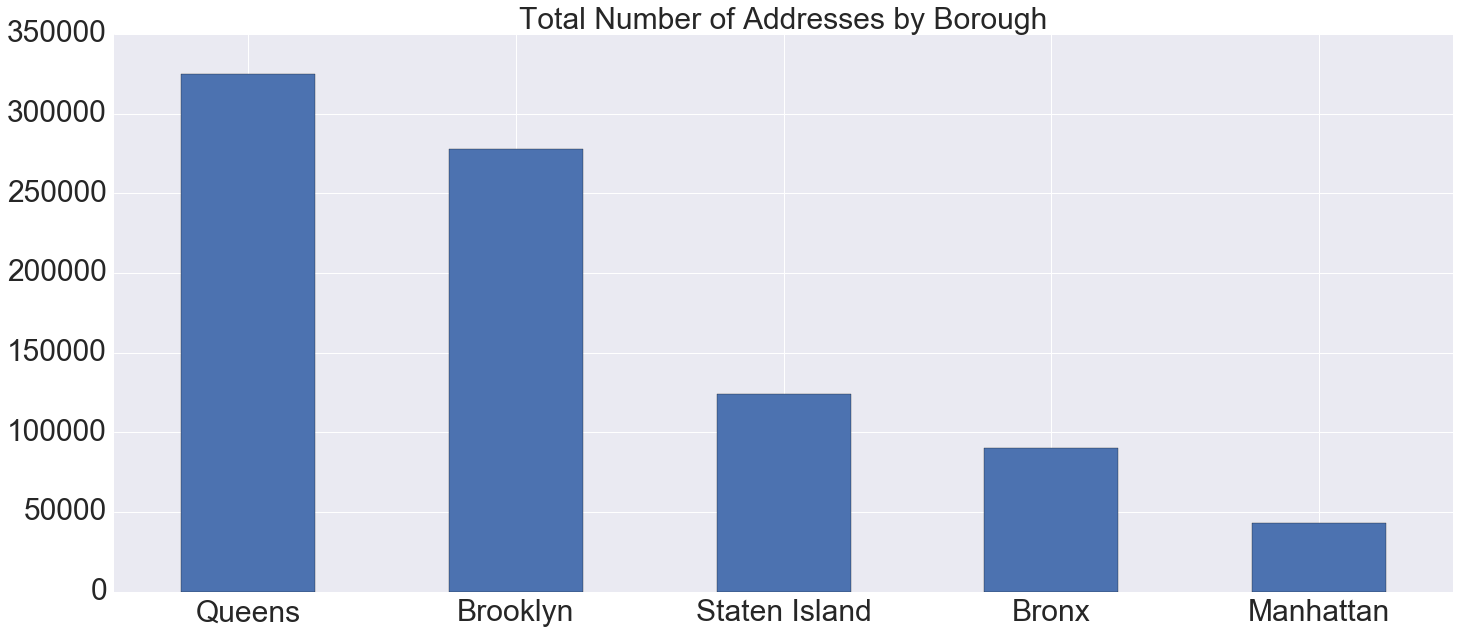

In [8]:
ax = pluto['Borough'].value_counts().plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Total Number of Addresses by Borough", fontsize=30)

In [9]:
pluto['Borough'].value_counts()[['Queens', 'Brooklyn']].sum() / pluto['Borough'].value_counts().sum() 

0.70079666668606444

Queens and Brooklyn dominate the rankings, with the two boroughs together composing over 70% of addresses in New York City. Manhattan by contrast provides just 5% of them. Staten Island and the Bronx split the remaining difference at just over and just under 12.5% each, respectively. In other words, for every 1 address in Manhattan, there are 2 in the Bronx, 3 in Staten Island, 6 in Brooklyn, and 8 in Queens!

The scale of the difference between the number of residences in Manhattan and the number in the other boroughs is surprising, but to truly interpret this result we need to keep the sizes and populations of each borough in mind. Manhattan squeezes about two-thirds the population of Queens onto an island one-quarter the size, for example, a fact that defies easy classification.

A city block in Manhattan is wider than it is long, with each horizontal avenue measuring out approximately three diagonal streets in length <!--(ever been to [6 1/2 Avenue](https://en.wikipedia.org/wiki/6%C2%BD_Avenue)?)-->. [Using a figure given by *The New York Times* in 2006](http://www.nytimes.com/2006/09/17/nyregion/thecity/17fyi.html?_r=0) (if you like this sort of thing&mdash;I know I do&mdash;also check out [the breakdown given in the 1892 World Almanac](http://stuffnobodycaresabout.com/2012/11/19/all-new-york-city-streets-are-not-created-equal/)), this makes for ~140 streets per square mile. By summing up the total lot areas and filtering out parks and greenspaces we can measure the average number of properties per city block:

In [10]:
# pluto[pluto['Address'] == 'BODY OF WATER'] # srs?

In [11]:
non_park_pluto = pluto[(pluto['Address'].notnull()) & 
                  (pluto['ZoneDist1'] != 'PARK') &
                  (pluto['ZoneDist1'] != 'PARKNYS') &
                  (pluto['ZoneDist1'] != 'PARKUS') &
                  (pluto['ZoneDist1'] != 'ZNA')
                 ]

In [12]:
# According to Wikipedia the areas are 42, 71, 23, 109, and 58 square miles, respectively.
# However we are going by total lot area for actual building lots, which will be significantly less.
# A further correction, we will remove lots without addresses and parks from consideration.
lot_areas = non_park_pluto.groupby(['Borough'])['LotArea'].sum().map(lambda x: x / 27878400)
lot_areas

Borough
Bronx            23.680097
Brooklyn         41.117435
Manhattan        13.074886
Queens           70.542453
Staten Island    36.943998
Name: LotArea, dtype: float64

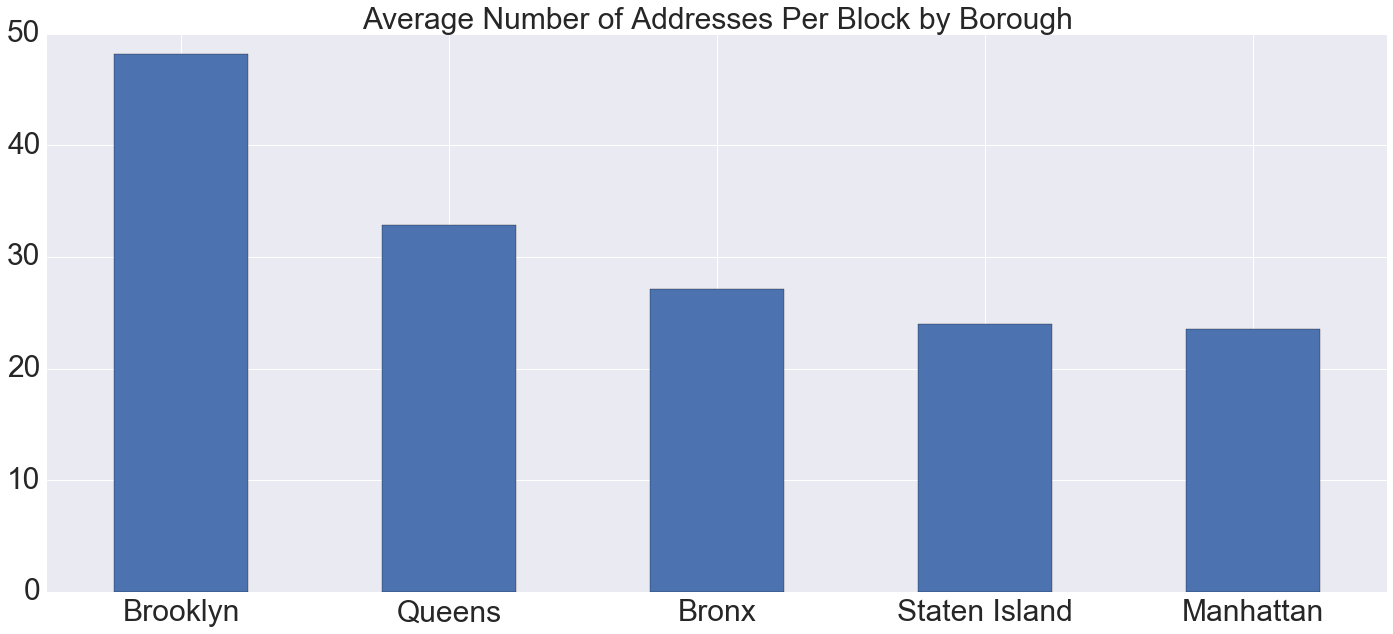

In [13]:
# boroughs = pd.DataFrame({'borough': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
#                          'population': [1636268, 1438159, 2621793, 2321580, 473279],
#                          'area': [23, 42, 71, 109, 58]}).set_index('borough')

# NEED TO ANNOTATE THESE LATER:
# http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# DO IT!

boroughs = pd.DataFrame({'population': [1636268, 1438159, 2621793, 2321580, 473279],
                         'area': lot_areas},
                         index=lot_areas.index)

address_data = (pluto['Borough'].value_counts().sort_index() /
                boroughs['area'].sort_index()
                / 140).sort_values(ascending=False)
ax = address_data.plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Addresses Per Block by Borough", fontsize=30)

Brooklyn is easily the densest of the boroughs, packing twice as many addresses per block as Manhattan, the land of skyscrapers.

Staten Island is comparably dense with Manhattan. Staten Island is the most suburban of the five boroughs, so lots there are larger as a natural consequence of its lower population density and cooler real estate market.

The Bronx by contrast, as a consequence of its late development relative to the history of the other boroughs, is the most consolidated of the outer boroughs, netting it a disproportionate share of the city's apartment complexes and [project housing](https://en.wikipedia.org/wiki/List_of_New_York_City_Housing_Authority_properties).

These facts becomes easy to see if we swap to measuring density by number of persons per address.

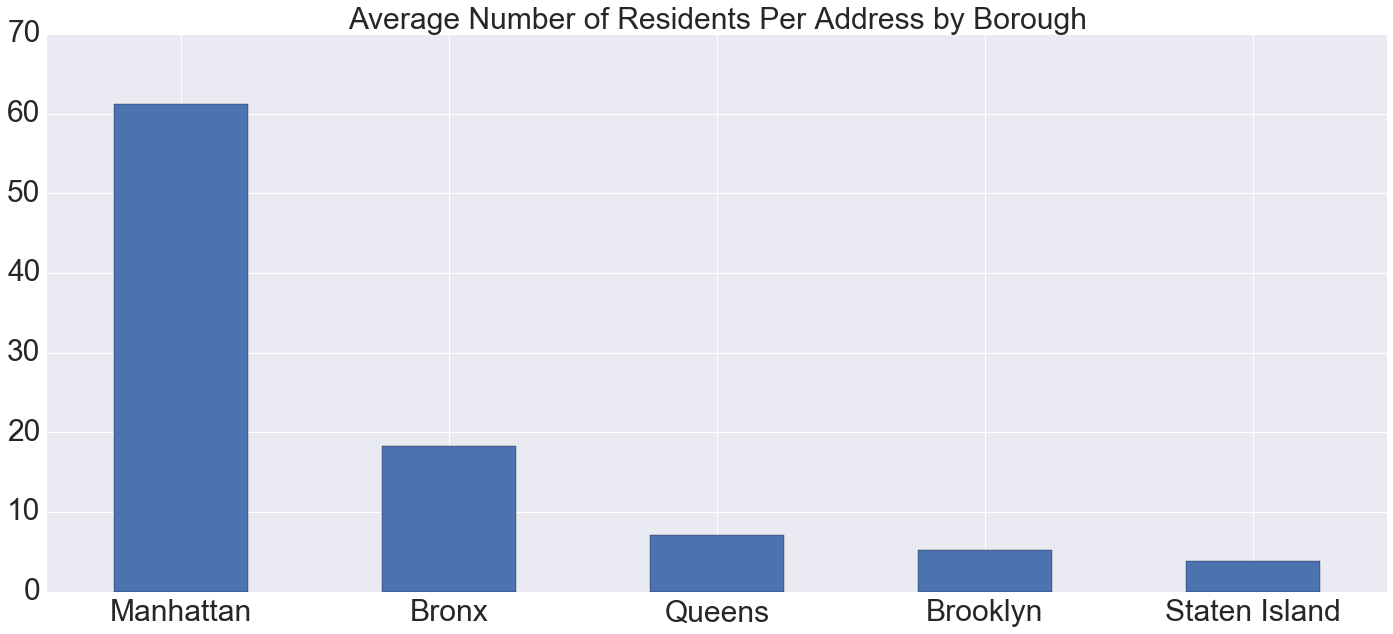

In [14]:
# NEEDS LABELS! See the earlier note.
person_data = (boroughs['population'].sort_index() /
               non_park_pluto['Borough'].value_counts().sort_index()).sort_values(ascending=False)
person_data.index.name = ''
ax = person_data.plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Residents Per Address by Borough", fontsize=30)

Manhattan absolutely crushes this ranking, packing fifteen times as many people per address (approximately 61) as Staten Island does (approximately 4)!

As per our discussion before, the Bronx (approximately 18 residents per addresss) is two-and-a-half as dense per address as runner-up Queens is (approximately 7 residents per address).

Queens fits somewhat fewer people (2.3 versus 2.6 million) onto a significantly greater area (109 versus 71 square miles), yet&mdash;as a consequence of having such a smaller lot size&mdash;Brooklyn nevertheless has significantly fewer people per building (approximately 5 residents per address).

If we mix these two metrics up we can compute the average number of people per block for each of the boroughs.

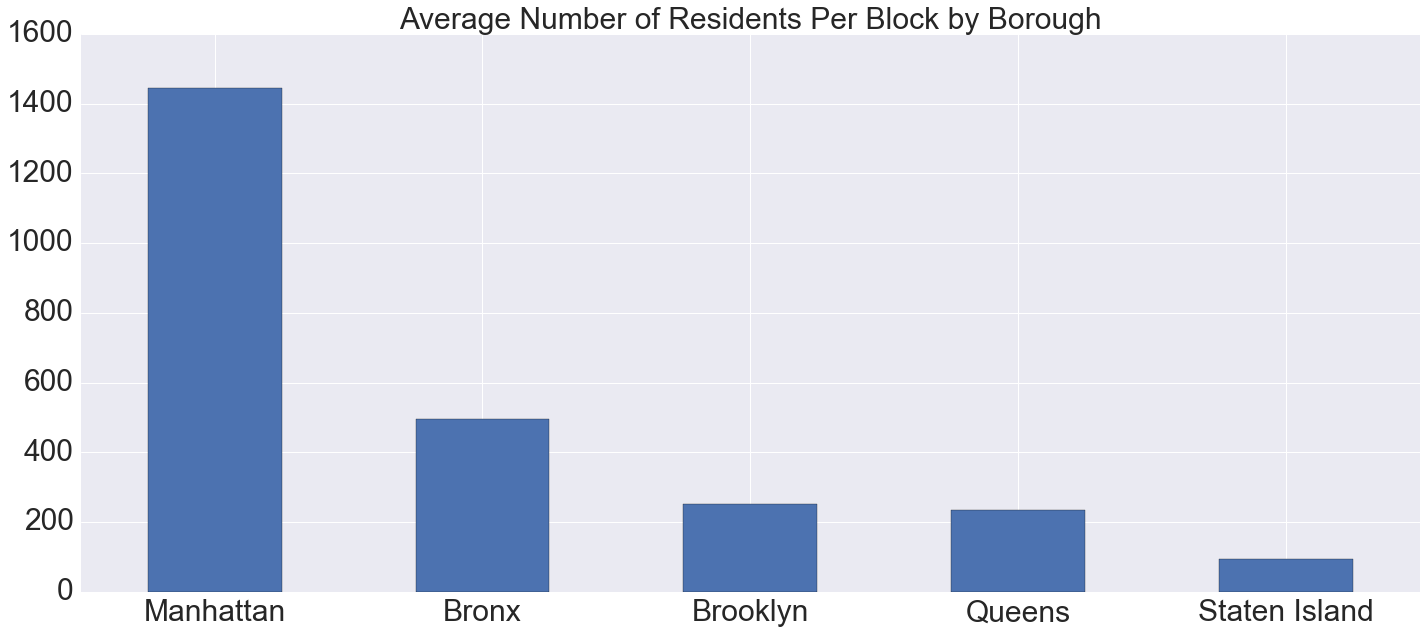

In [15]:
ax = (person_data * address_data).sort_values(ascending=False).plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Average Number of Residents Per Block by Borough", fontsize=30)

Though Brooklyn and Queens again swap places, the overall picture is about the same.

So far we've stuck to computations by borough, but let's try to aggregate the data on a more local level. The definition of a neighborhood is a slippery one&mdash;where does Little Italy end and Chinatown begin?&mdash;so a discrete boundary&mdash;like, say, [ZIP codes](http://nyc.pediacities.com/New_York_City_ZIP_Codes)&mdash;is more appropriate.

In [16]:
(person_data * address_data)

Bronx             496.812932
Brooklyn          250.574097
Manhattan        1443.870472
Queens            235.848165
Staten Island      92.817792
dtype: float64

It's a pointfile, not a shapefile! Argh! Will need to cast around for a solution.

## Address Length

What would *you* do with a record of every address in New York City?

To start with, let's take a look at addresses by character length. Not every property in New York City has an address: parks don't, for instance, nor do many empty lots, though others get assigned the name of the nearest largest street. There are also a handful of "other options" in the dataset as well: for instance there are several entities addressed as `BODY OF WATER`, and at least one, I kid you not, `CLIFF` (missing coordinate data too&mdash;natch).

Let's assume that a valid address is of the form `120 COURT STREET`, that is, an address number followed by at least two strings seperate strings for the street. There's one important exception to this rule&mdash;Manhattan piers are simply a pier and a number, e.g. `PIER 19`. We'll include those, too.

In [17]:
def map_address_length(address):
    if len(address.split(' ')) >= 3 or 'PIER' in address and len(set.intersection({str(n) for n in range(1, 10)}, set(address))) > 0:
            return int(len(address.replace(' ', '')))
    else:
        return None

In [18]:
map_address_length('PIER 12'), map_address_length('2 COURT STREET'), map_address_length('2 COURT')

(6, 12, None)

In [19]:
address_lengths = pluto[pluto['Address'].notnull()]['Address'].map(map_address_length)

In [20]:
# PIER 9 is a defunct restaurant address which is the sole 5-lengther, so let's remove it.
address_lengths = address_lengths[address_lengths >= 6]

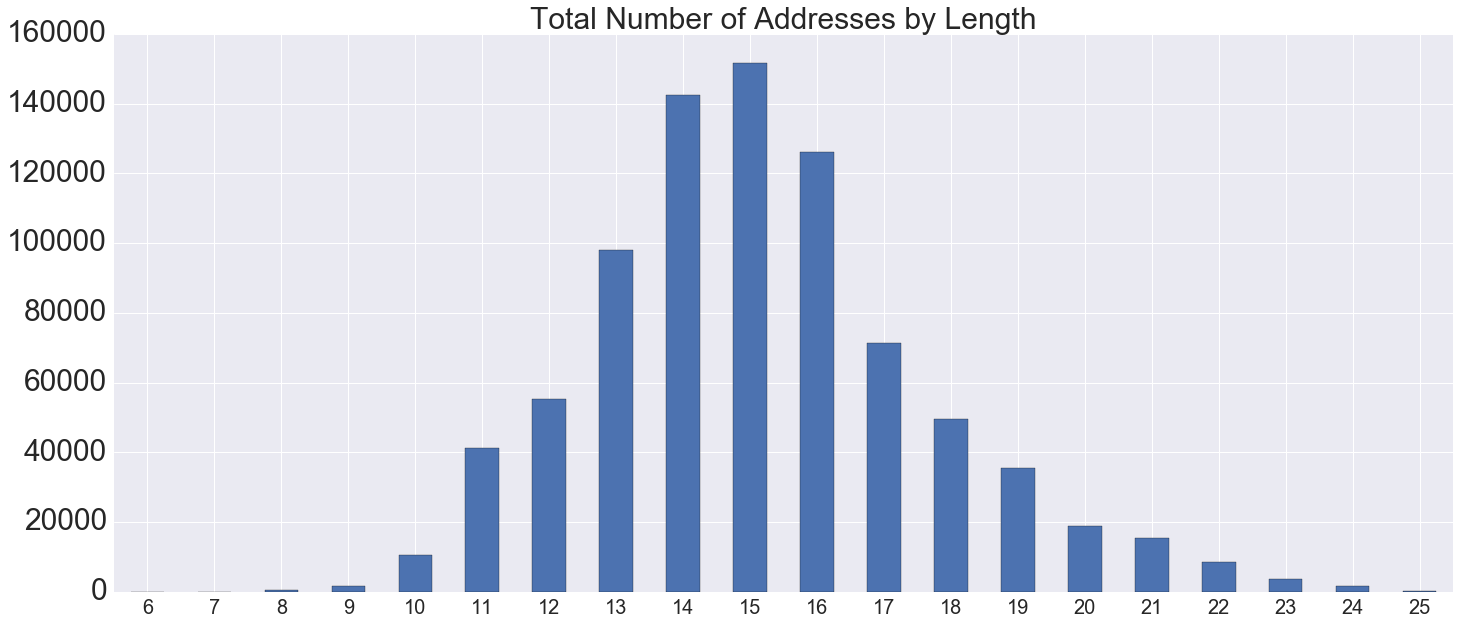

In [21]:
ax = address_lengths.value_counts().sort_index().plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], fontsize=20, ha='center', rotation=0)
ax.set_title("Total Number of Addresses by Length", fontsize=30)

In [22]:
address_lengths.value_counts()[[14, 15, 16]].sum() / address_lengths.value_counts().sum()

0.50509447253336415

In [23]:
address_lengths.value_counts()[range(5, 14)].sum(), address_lengths.value_counts()[range(17, 25)].sum()

(207209.0, 204326)

In [24]:
address_lengths.describe()

count    831882.000000
mean         15.139373
std           2.521332
min           6.000000
25%          14.000000
50%          15.000000
75%          16.000000
max          25.000000
Name: Address, dtype: float64

In [25]:
# pluto.iloc[address_lengths[address_lengths == 5].index]

In [26]:
pluto.iloc[address_lengths[address_lengths == 25].index].sample(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
556414,Queens,13539.0,60.0,413.0,664.00,3005.0,29.0,31.0,11422.0,E314,105.0,3620.0,4.0,13.0,7E,146-21 BROOKVILLE BOULEVARD,R3A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3A,NaN,N,B1,1.0,0.0,NaN,"CASSEUS, JEAN",2367.0,2722.0,0.0,2722.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,24.92,95.00,22.0,45.0,G,2.0,N,3.0,1.0,5324.0,23277.0,0.0,0.0,1945.0,E,0.0,0.0,NaN,NaN,1.15,0.6,0.0,1.0,4.0,4.135390e+09,0.0,664.0,1055072.0,178938.0,19b,NaN,417 108,45701.0,NaN,0.000000e+00,NaN,1.0,16v1
544419,Queens,12889.0,7.0,413.0,616.02,1003.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,6C,129-33 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A2,1.0,0.0,NaN,"BLAKE , AUDLEY B",4988.0,1196.0,0.0,1196.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,43.00,116.00,26.0,46.0,NaN,1.0,N,5.0,2.0,10620.0,27000.0,0.0,0.0,1965.0,E,0.0,0.0,NaN,NaN,0.24,0.5,0.0,1.0,4.0,4.128890e+09,0.0,61602.0,1059515.0,186692.0,19c,NaN,414 062,45405.0,NaN,0.000000e+00,NaN,1.0,16v1
560509,Queens,13736.0,1.0,413.0,694.00,1006.0,29.0,31.0,11422.0,E314,105.0,3620.0,4.0,13.0,7E,148-50 BROOKVILLE BOULEVARD,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,B2,1.0,0.0,P,BASSIER DOREEN A,5166.0,2000.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,2.0,46.50,93.67,20.0,50.0,NaN,1.0,Y,3.0,2.0,9935.0,26839.0,1550.0,1550.0,1993.0,NaN,0.0,0.0,NaN,NaN,0.39,0.6,0.0,1.0,4.0,4.137360e+09,0.0,694.0,1054541.0,177470.0,19b,NaN,417 034,45703.0,NaN,4.137360e+09,1/29/1993,1.0,16v1
552264,Queens,13232.0,4.0,413.0,638.00,2001.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,7C,137-08 BROOKVILLE BOULEVARD,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,A1,1.0,0.0,NaN,MARISOL CARRION,2115.0,3024.0,0.0,3024.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.00,84.58,18.0,42.0,NaN,1.0,N,5.0,2.0,5844.0,27003.0,1550.0,1550.0,2004.0,NaN,0.0,0.0,NaN,NaN,1.43,0.6,0.0,1.0,4.0,4.132320e+09,0.0,638.0,1057371.0,183389.0,19b,NaN,414 078,45505.0,NaN,0.000000e+00,NaN,1.0,16v1
551820,Queens,13204.0,97.0,413.0,638.00,1002.0,29.0,31.0,11422.0,E314,105.0,3531.0,4.0,13.0,7C,134-23 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,C1-3,NaN,NaN,NaN,NaN,C1-3/R2,NaN,N,V1,11.0,0.0,NaN,IVY CIP LAND HOLDINGS,2695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,118.75,66.67,0.0,0.0,NaN,0.0,Y,5.0,5.0,67545.0,67545.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.5,0.0,1.0,4.0,4.132040e+09,0.0,638.0,1058114.0,184587.0,19c,NaN,414 079,45505.0,NaN,0.000000e+00,NaN,1.0,16v1


It seems that address lengths (excluding spaces) are approximately normally distributed in New York City, and surprisingly tightly so: **half of the addresses in New York City come in at 14, 15, or 16 characters long**.

Non-mean address lengths distribute approximately evenly into either tail, but the right tail is slightly thinner and longer&mdash;e.g. "long" addresses tend to be especially long, whilst "short" addresses tend to be only somewhat shorter than average.

There is no single shortest address in New York City: there are a number of two-number piers, e.g. `PIER 40`, `PIER 52`, etc. Following up on these, there are a sizable number of short place-names, such as `74 6 ROAD` in Queens or `5 3 PLACE` in Brooklyn, which seem to occur mostly in these two boroughs.

There is also no single longest address: there are over a hundred addresses in Queens on Woodhaven Boulevard with names like `103-29A WOODHAVEN BOULEVARD` which take the prize for longest in the city.

The following GIF plays it all out.

*Animated GIF of the addresses by character count.*

# Address Characteristics

Let's tokenize address endings to see which words are most common.

In [27]:
from collections import Counter
from tqdm import tqdm

end_address_tokens = Counter()

# We split and take [-1:] to remove the address non-ending from consideration.
for words in tqdm([address.split(' ')[-1:] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    end_address_tokens.update(words)

100%|██████████| 858649/858649 [00:05<00:00, 147457.04it/s]


In [28]:
def is_number(element):
    try:
        float(element)
    except ValueError:
        return False
    return True

In [29]:
# Chart is not that helpful...
# pd.Series({token[0]: token[1] for token in address_tokens.most_common(200) if not is_number(token[0])}).sort_values(ascending=False).plot(kind='bar', figsize=(30, 12))

In [30]:
from prettypandas import PrettyPandas

In [31]:
# This is the full table, paste this to Gist!
top_endings = pd.DataFrame.from_records([token for token in end_address_tokens.most_common(400) if not is_number(token[0]) and len(token[0]) > 1],
                                        columns=['Token', 'Occurances'])
top_endings.index = top_endings.index + 1
top_endings.index.name = 'Rank'
# Make an effort to merge certain extremely common abbreviations.
# top_100.iloc[0, 1] = top_100.iloc[0, 1] + top_100.iloc[14, 1] # St -> Street
# top_100.iloc[6, 1] = top_100.iloc[6, 1] + top_100.iloc[13, 1] # Blvd > Boulevard
# top_100 = top_100.drop([14, 15])

top_endings['Token'] = top_endings['Token'].map(str.title)
top_endings = top_endings.sort_values(by='Occurances', ascending=False)
top_endings = top_endings.reindex()
PrettyPandas(top_endings)

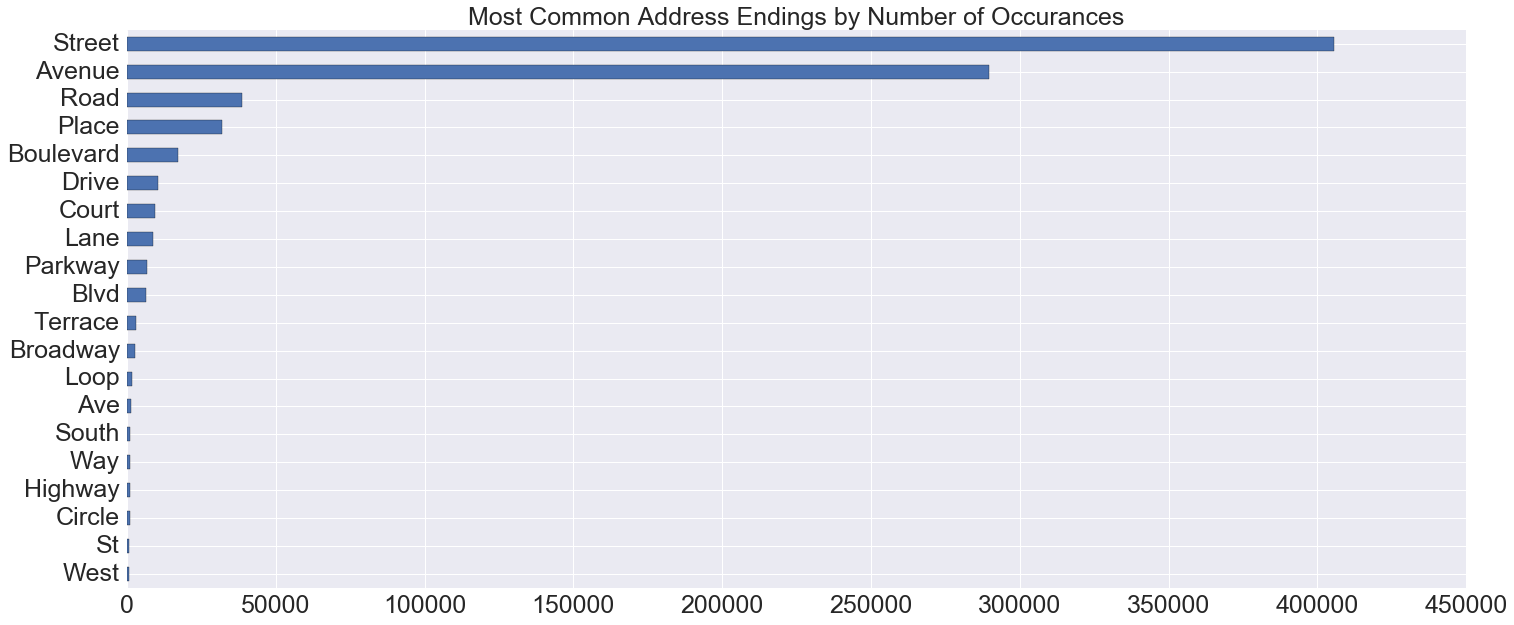

In [32]:
p = top_endings[:20].set_index('Token')['Occurances'].sort_values()
p.index.name = ""
p.title = ""
p.name = ""
ax = p.plot(figsize=(24, 10), kind='barh', fontsize=25)
ax.set_title("Most Common Address Endings by Number of Occurances", fontsize=25)

In [33]:
top_endings[:2]['Occurances'].sum() / top_endings['Occurances'].sum()

0.82221031983910497

In [34]:
top_endings[:20]['Occurances'].sum() / top_endings['Occurances'].sum()

0.99240927487292629

Place-name endings have very little variety, with **82% of the addresses in New York City ending in either "Street" or "Avenue"**. **The top 20 most common tokens cover over 99% of addresses in New York City**!

# Address Depth

In [35]:
filtered_pluto = pluto[pluto['Address'].notnull()]
# There are a lot of junk results for empty lots which don't have a specified lot number but whatever.
# Those entries we can simply filter out by hand, given the scope of the analysis.
filtered_pluto['Street'] = filtered_pluto['Address'].map(lambda a: ' '.join(a.split(' ')[1:]))

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
street_tokens = Counter()

for borough, street in zip(filtered_pluto['Borough'].values, filtered_pluto['Street'].values):
    if street not in ['AVENUE', 'STREET', 'ROAD']:
        street_tokens.update([(borough, street.title())])

In [37]:
n = 2000
boroughs = [count[0][0] for count in street_tokens.most_common(n)]
streets = [count[0][1] for count in street_tokens.most_common(n)]
counts = [count[1] for count in street_tokens.most_common(n)]

address_counts = pd.DataFrame({'Borough': boroughs, 'Street': streets, 'Count': counts})
address_counts.index += 1
address_counts.index.name = 'Rank'

In [38]:
address_counts[(address_counts['Borough'] == 'Manhattan') & (address_counts['Street'] == 'Broadway')]['Count'].values[0] + address_counts[(address_counts['Borough'] == 'Bronx') & (address_counts['Street'] == 'Broadway')]['Count'].values[0]

1118

Broadway appears on this list because of its almost unique habit of naming addresses all on its own: whilst a building on another avenue would be `123 3rd Avenue`, when they are on Broadway they are more usually, *but not always*, simply `123 Broadway`. Combined with the fact that [the Broadway is the longest street in New York City](https://en.wikipedia.org/wiki/Broadway_%28Manhattan%29) (and the only one I'm aware of which crosses two boroughs), this makes Broadway one of the most heavily addressed street in New York City, with 1118 addresses overall.

Expanding on this observation, here are the five most heavily addressed streets in each borough:

In [39]:
import matplotlib as plt

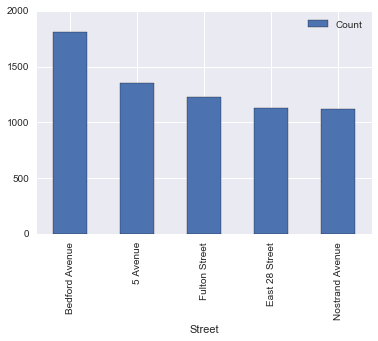

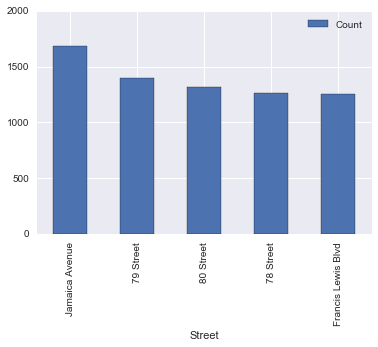

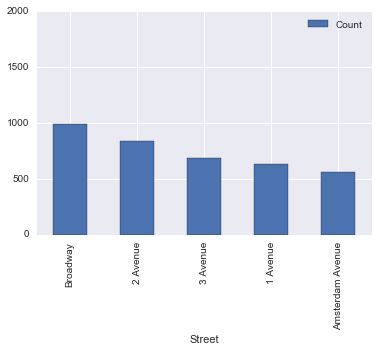

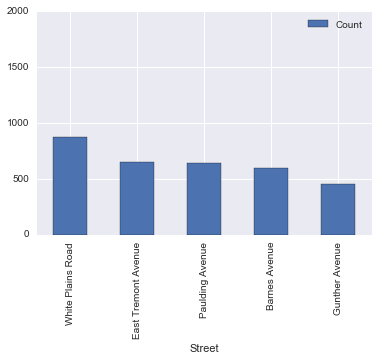

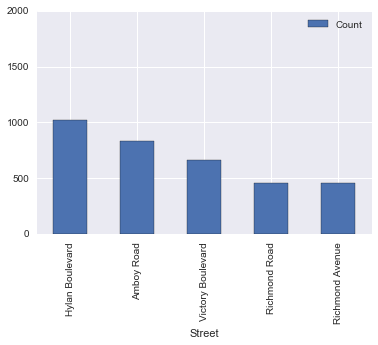

In [40]:
def bar_chart_it(df):
    return df.plot.bar(x='Street', y='Count', ylim=[0, 2000])

brooklyn = bar_chart_it(address_counts[address_counts['Borough'] == 'Brooklyn'][:5])
queens = bar_chart_it(address_counts[address_counts['Borough'] == 'Queens'][:5])
manhattan = bar_chart_it(address_counts[address_counts['Borough'] == 'Manhattan'][:5])
bronx = bar_chart_it(address_counts[address_counts['Borough'] == 'Bronx'][:5])
staten_island = bar_chart_it(address_counts[address_counts['Borough'] == 'Staten Island'][:5])

*To save myself a headache I hand-parallelized the charts using Inkscape.*

!['stuff'](most_heavily_addressed_streets_per_borough.png 'stuff')

# Street length visualization data processing

The number of addresses associated with a certain street is a distinguishable concept from that of the actual length of that street.

I wanted to construct a visualization of street length by plotting streets' polylines on a map. This requires solving a number of challenges:

1. Taking from the raw dataset a list of all validly-named streets in New York City.
2. Many streets are unique within a borough but not unique within the whole of New York. There are three Broadways, for instance. To handle this problem I need to cluster coordinates by the individual street that they are associated with.
3. I need to pass those coordinates to a line generation function.

# Extracting valid street names

The following code extracts a list of valid street names from the raw dataset.

1. Remove entries with missing addressal information or missing coordinates.
2. Discard addresses not containing at least one space character `' '`, signaling incompleteness.
3. Discard the address number at the beginning of the address, if it exists. The cases are:
  1. **Simple addresses**: `23 HANCOCK STREET`.
  2. **Lettered addresses**: `23A HANCOCK STREET`.
  3. **Compound addresses**: `23-42 HANCOCK STREET`.

In [125]:
def discard_address_number(address_string):
    split = address_string.split(' ')
    cand = split[0]
    if '-' in cand:
        cand = address_string.split('-')[0] # We may test one side and assume it is representative.
    try:
        int(cand)
        return ' '.join(split[1:])
    except:
        pass
    try:
        int(cand[:-1])
        return ' '.join(split[1:])
    except:
        pass
    return ' '.join(split[1:])

In [135]:
# Remove entries with missing addressal information or missing coordinates.
filtered_pluto = pluto[(pluto['Address'].notnull()) & (pluto['XCoord'].notnull()) & (pluto['YCoord'].notnull())]
# Discard addresses not containing at least one space character ' ', signaling incompleteness.
filtered_pluto = pluto[pluto['Address'].map(lambda x: ' ' in str(x))]
# Discard the address number at the beginning of the address, if it exists.
streets = filtered_pluto['Address'].map(discard_address_number)
filtered_pluto['Street'] = streets

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Clustering streets

After the previous step in this process we have `streets`, a set of every street name in New York City. However, street names are not unique except within a borough, so we have to apply a clustering algorithm to the streets to seperate them into seperate bunches.

# Street polyline generation construction

The next few cells walk through the process of generating a polyline for an example street. The example chosen here is Broadway.

In [41]:
import mplleaflet
from pyproj import Proj
import matplotlib.pyplot as plt

In [42]:
import scipy

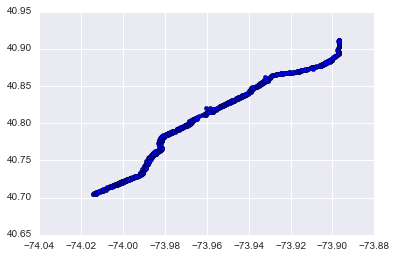

In [152]:
# Extract filled Broadway coordinates.
coords = pluto[pluto['Address'].map(lambda a: ('BROADWAY' in str(a)) & ('EAST' not in str(a)) & ('WEST' not in str(a)))][['XCoord', 'YCoord', 'Borough']]
coords = coords[(coords['Borough'] == 'Manhattan') | (coords['Borough'] == 'Bronx')]
coords = coords.dropna()
# Reproject from state grid to global coordinates.
projstr = '+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
pnyc = Proj(projstr,
            preserve_units=True)
coords = [pnyc(x, y, inverse=True) for x, y in zip(coords['XCoord'], coords['YCoord'])]

# Plot the resulting scatter.
plt.scatter([c[0] for c in coords], [c[1] for c in coords])
plt.figure(figsize=(24,10))
# mplleaflet.show()
plt.show()

In [44]:
# Apply a linear regression to get general orientation.
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress([c[0] for c in coords], [c[1] for c in coords])

# Get the coordinate on the line each point is closest to by solving for the residual.
r_slope = -1/slope
closest_linear_coords = []
for x, y in coords:
    b = y - r_slope*x
    x_int = (intercept - b)/(r_slope - slope)
    y_int = slope*x_int + intercept
    closest_linear_coords.append((x_int, y_int))
# plt.plot([c[0] for c in closest_linear_coords], [c[1] for c in closest_linear_coords])
# Since we now have a line we can pick a major axis and rank points based on their position on that axis.
x_extent = max([c[0] for c in closest_linear_coords]) - min([c[0] for c in closest_linear_coords])
y_extent = max([c[1] for c in closest_linear_coords]) - min([c[1] for c in closest_linear_coords])
if x_extent >= y_extent:
    array = np.array([c[0] for c in closest_linear_coords])
else:
    array = np.array([c[1] for c in closest_linear_coords])
order = array.argsort()
ranks = order.argsort()
sorted_coords = list(zip([c[0] for c in coords], [c[1] for c in coords], ranks))
sorted_coords.sort(key=lambda x: x[2])
sorted_coords = [(x, y) for x, y, rank in sorted_coords]
plt.plot([c[0] for c in sorted_coords], [c[1] for c in sorted_coords])
# At this point we have successfully constructed our line!
mplleaflet.show()

In [45]:
# Our addresses are on either side of the street, while we want the center.
# The first step to remapping the points is computing centroids so that our points move onto the street.
centroid_coords = []
for i in range(0, len(sorted_coords) - 4):
    x_c = (sorted_coords[i][0] + sorted_coords[i + 1][0] + sorted_coords[i + 2][0] + sorted_coords[i + 3][0] + sorted_coords[i + 4][0]) / 5
    y_c = (sorted_coords[i][1] + sorted_coords[i + 1][1] + sorted_coords[i + 2][1] + sorted_coords[i + 3][1] + sorted_coords[i + 4][1]) / 5
    centroid_coords.append((x_c, y_c))
plt.plot([c[0] for c in centroid_coords], [c[1] for c in centroid_coords])
mplleaflet.show()

In [46]:
# Then we simplify the result with a Visvalignam-Wyatt polyline simplification algorithm to generate a finished
# smooth curve!
import visvalingamwyatt as vw
simplifier = vw.Simplifier(centroid_coords)
# simplified_coords = simplifier.simplify(ratio=0.05)
simplified_coords = simplifier.simplify(number=20)
plt.plot([c[0] for c in simplified_coords], [c[1] for c in simplified_coords])
mplleaflet.show()

In [47]:
import math

In [421]:
import mplleaflet
from pyproj import Proj
import matplotlib.pyplot as plt
import scipy
import visvalingamwyatt as vw
import math
from geopy.distance import vincenty
import geojson

projstr = '+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
pnyc = Proj(projstr,
            preserve_units=True)

"""
Given a pandas DataFrame containing addressal information derived from PLUTO, generates a list of coordinates
associated with the given street.

df: The PLUTO-derived pandas DataFrame from which the information is being drawn.
proj: The reusable pyproj projection that is being used to map coordinates from the state grid to global coordinates.
street_name: The name of the street that you want coordinates for. Must be in all-caps and must match the notation
used in the PLUTO dataset.
n: The number of points in the final polyline. For best results this parameter should be tuned to match the complexity
of the street: e.g. since most streets are linear, despite the complexity of the algorithm just n=2 will provide the
best results.
"""
def generate(df, proj, street_name, n=20):
    # Extract non-empty coordinates.
    coords = df[df['Street'].map(lambda a: street_name in str(a))][['XCoord', 'YCoord', 'Borough']]
    coords = coords.dropna()
    coords = [proj(x, y, inverse=True) for x, y in zip(coords['XCoord'], coords['YCoord'])]
    # Apply a linear regression to get general orientation.
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress([c[0] for c in coords], [c[1] for c in coords])
    # Get the coordinate on the line each point is closest to by solving for the residual.
    r_slope = -1/slope
    closest_linear_coords = []
    for x, y in coords:
        b = y - r_slope*x
        x_int = (intercept - b)/(r_slope - slope)
        y_int = slope*x_int + intercept
        closest_linear_coords.append((x_int, y_int))
    # Since we now have a line we can pick a major axis and rank points based on their position on that axis.
    x_extent = max([c[0] for c in closest_linear_coords]) - min([c[0] for c in closest_linear_coords])
    y_extent = max([c[1] for c in closest_linear_coords]) - min([c[1] for c in closest_linear_coords])
    if x_extent >= y_extent:
        array = np.array([c[0] for c in closest_linear_coords])
    else:
        array = np.array([c[1] for c in closest_linear_coords])
    order = array.argsort()
    ranks = order.argsort()
    sorted_coords = list(zip([c[0] for c in coords], [c[1] for c in coords], ranks))
    sorted_coords.sort(key=lambda x: x[2])
    sorted_coords = [(x, y) for x, y, rank in sorted_coords]
    # Remove false positive coordinates which are more than a certain distance from their preceding neighbor.
    # Otherwise random buildings with the same street in their address get included in the plot!
    i = 1
    while True:
        if math.sqrt((sorted_coords[i][0] - sorted_coords[i - 1][0])**2 + (sorted_coords[i][1] - sorted_coords[i - 1][1])**2) > 0.01:
            del sorted_coords[i]
        else:
            i += 1
        if i > len(sorted_coords) - 1:
            break
    # plt.plot([c[0] for c in sorted_coords], [c[1] for c in sorted_coords])
    centroid_coords = []
    for i in range(0, len(sorted_coords) - 4):
        x_c = (sorted_coords[i][0] + sorted_coords[i + 1][0] + sorted_coords[i + 2][0] + sorted_coords[i + 3][0] + sorted_coords[i + 4][0]) / 5
        y_c = (sorted_coords[i][1] + sorted_coords[i + 1][1] + sorted_coords[i + 2][1] + sorted_coords[i + 3][1] + sorted_coords[i + 4][1]) / 5
        centroid_coords.append((x_c, y_c))
    simplifier = vw.Simplifier(centroid_coords)
    # simplified_coords = simplifier.simplify(ratio=0.05)
    simplified_coords = simplifier.simplify(number=n)
    return simplified_coords

"""
Given a list of coordinates, plots them using mplleaflet.
"""
def plot_coordinates(coords):
    plt.plot([c[0] for c in coords], [c[1] for c in coords], color='black')
    mplleaflet.show()

"""
Given a sorted list of coordinates, calculates the total distance encoded in it.
"""
def distance(coords):
    d = 0
    for i in range(0, len(coords) - 1):
        d += vincenty(coords[i][::-1], coords[i + 1][::-1]).miles
    return d

In [389]:
distance(generate(filtered_pluto[(filtered_pluto['Borough'] == 'Manhattan')], pnyc, '2 AVENUE', n=2))

6.276608091706261

In [49]:
# plot_coordinates(generate(filtered_pluto[(filtered_pluto['Borough'] == 'Manhattan')], pnyc, '2 AVENUE', n=2))

In [50]:
# Test case, Google says 6.4 miles.
# Looking at the plot I dont see a difference so it might come down to measuring technique or
# my lacking the last five and first five addresses (so I start and end a street early, usually).
distance(generate(filtered_pluto[(filtered_pluto['Borough'] == 'Manhattan')], pnyc, '2 AVENUE', n=2))

6.276608091706261

In [51]:
# plot_coordinates(generate(filtered_pluto[(filtered_pluto['Borough'] == 'Manhattan') | (filtered_pluto['Borough'] == 'Bronx')], pnyc, 'BROADWAY', n=10))

In [52]:
# plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Staten Island'], pnyc, 'RICHMOND ROAD'))
# plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Manhattan'], pnyc, '2 AVENUE', n=2))
# plot_coordinates(generate(filtered_pluto[filtered_pluto['Borough'] == 'Bronx'], pnyc, 'WHITE PLAINS ROAD', n=5))

In [53]:
# plot_coordinates(generate(filtered_pluto, pnyc, 'JAMAICA AVENUE', n=10))

In [54]:
len(list(set([name.upper() for name in address_counts['Street'].values])))

1788

In [137]:
street_dist_tuples = []
for street in tqdm(list(set([name.upper() for name in address_counts['Street'].values]))):
    try:
        d = distance(generate(filtered_pluto, pnyc, street, n=10))
    except IndexError:
        continue
    street_dist_tuples.append((street, d))

100%|██████████| 1788/1788 [14:52<00:00,  1.96it/s]


In [ ]:
# plot_coordinates(generate(filtered_pluto, pnyc, '5 STREET', n=10))

In [ ]:
# plot_coordinates(generate(filtered_pluto, pnyc, '6 STREET', n=10))

In [ ]:
# plot_coordinates(generate(filtered_pluto, pnyc, '221 STREET', n=10))

In [138]:
# Results of manual inspection: 5 STREET and 6 STREET are obvious errors, but the rest of the results are all good!
streets_by_length = pd.Series([a[1] for a in street_dist_tuples], index = [a[0] for a in street_dist_tuples]).sort_values(ascending=False)
streets_by_length

5 STREET               10.327448
6 STREET               10.305107
JAMAICA AVENUE          9.787291
UNION TURNPIKE          9.218584
AMBOY ROAD              8.649588
KILL ROAD               8.145623
ARTHUR KILL ROAD        8.127170
VICTORY BOULEVARD       7.804330
FLATBUSH AVENUE         7.523213
QUEENS BOULEVARD        7.282688
BRUCKNER BOULEVARD      7.222720
WHITE PLAINS ROAD       7.195363
SUTTER AVENUE           7.105861
217 STREET              7.078381
89 AVENUE               6.912409
PARSONS BOULEVARD       6.701837
BEACH CHANNEL DRIVE     6.422534
EAST TREMONT AVENUE     6.150774
212 STREET              6.138422
215 STREET              6.095401
KINGS HIGHWAY           6.077086
221 STREET              5.922925
220 STREET              5.901590
3 AVENUE                5.876340
RICHMOND TERRACE        5.810865
4 AVENUE                5.802148
FRANCIS LEWIS BLVD      5.758566
210 STREET              5.705378
211 STREET              5.684403
LINDEN BOULEVARD        5.615762
          

In [139]:
c_sbl = streets_by_length[2:]

At this point we run into a roadblock.

The way that this notebook is currently written we execute a search for a street length against every borough in New York City simultaneously. This has the advantage of picking up streets which path through multiple boroughs, but also the disadvantage that, in case of streets with the same name but completely different locations in different boroughs, we will only be able to look at one of those streets, not all of them.

For example, Broadway in Manhattan is indesputibly the longest street in New York City; yet when we execute the all-borough search some copycat streets of the name in Queens or in Manhattan get picked up instead!

We can restrict our attention to individual boroughs, but then we lose titleholders like, again, Broadway, and e.g. Jamaica Avenue, which have an extent across multiple boroughs.

How can we address this issue?

Thus the process of getting a top twenty longest list together is one of manual inspection. Above are the results for longest given by the all-borough search. Below are the ones given by the by-borough search.

In [185]:
broadway_fp = filtered_pluto[(filtered_pluto['Borough'] == 'Manhattan') | (filtered_pluto['Borough'] == 'Bronx')]
broadway_fp = broadway_fp[broadway_fp['Street'].map(lambda x: ('WEST' not in x) & ('EAST' not in x))]

In [ ]:
features = []
streets = [broadway, bedford, jamaica, union,]

for street, distance in zip():
    geom = geojson.LineString(generate(filtered_pluto, pnyc, street, n=10).tolist())
    features.append(geojson.Feature(geometry=geom, properties={'name': street, 'distance': distance}))

with open('streets.geojson', 'w') as file:
    file.write(geojson.dumps(geojson.FeatureCollection(features), sort_keys=True))

In [188]:
broadway = generate(broadway_fp, pnyc, 'BROADWAY', n=15)
distance(broadway)

15.996548583620461

In [350]:
# Unfortunately this one passing by Citi Field breaks it and we have to stitch it back together by hand.
nb_fp = filtered_pluto[filtered_pluto['Borough'] == 'Queens']
nb_fp = nb_fp[nb_fp['Address'].map(lambda a: 'NORTHERN BOULEVARD' in a)]
# plt.scatter(nb_fp['XCoord'], nb_fp['YCoord'])
# plt.figure(figsize=(24,10))
nb_fp_1 = nb_fp[nb_fp['XCoord'] < 1025000]
nb_fp_2 = nb_fp[nb_fp['XCoord'] > 1025000]
northern_1 = generate(nb_fp_1, pnyc, 'NORTHERN BOULEVARD', n=10)
northern_2 = generate(nb_fp_2, pnyc, 'NORTHERN BOULEVARD', n=10)
northern = np.concatenate((northern_1, northern_2))
distance(northern)

11.155116346034518

In [328]:
av_fp = filtered_pluto[((filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens'))]
av_fp = av_fp[av_fp['Address'].map(lambda x: 'ATLANTIC' in x)]
av_fp = av_fp[av_fp['YCoord'] > 160000]
# print(len(av_fp))
# plt.scatter(av_fp['XCoord'], av_fp['YCoord'])
# plt.figure(figsize=(24,10))
# mplleaflet.show()
# plt.show()
atlantic_avenue = generate(av_fp, pnyc, 'ATLANTIC AVENUE', n=15)
distance(atlantic_avenue)

10.08863581230231

In [168]:
bedford = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'BEDFORD AVENUE', n=10)
distance(bedford)

10.043175012861152

In [178]:
jamaica = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'JAMAICA AVENUE', n=10)
distance(jamaica)

9.787290868788215

In [190]:
union = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'UNION TURNPIKE', n=10)
distance(union)

9.218584178798292

In [193]:
amboy = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Staten Island')], pnyc, 'AMBOY ROAD', n=25)
distance(amboy)

8.860353233631804

In [194]:
# EXCLUDED: cuts across a park!
# seventy_nine = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, '79 STREET', n=25)
# distance(seventy_nine)

8.418984351889044

In [198]:
kill = generate(filtered_pluto[filtered_pluto['Borough'] == 'Staten Island'], pnyc, 'KILL ROAD', n=20)
distance(kill)

8.423141933283057

In [202]:
nostrand = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'NOSTRAND AVENUE', n=4)
distance(nostrand)

7.919369754814123

In [358]:
liberty = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'LIBERTY AVENUE', n=10)
distance(liberty)

7.901141533716976

In [392]:
victory = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Staten Island')], pnyc, 'VICTORY BOULEVARD', n=10)
distance(victory)

7.8043297155450535

In [204]:
hillside = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'HILLSIDE AVENUE', n=4)
distance(hillside)

7.55379320027821

In [206]:
flatbush = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'FLATBUSH AVENUE', n=4)
distance(flatbush)

7.4828300839455135

In [215]:
queens = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, 'QUEENS BOULEVARD', n=8)
distance(queens)

7.2606448379235395

In [229]:
white_plains = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Bronx')], pnyc, 'WHITE PLAINS ROAD', n=8)
distance(white_plains)

7.190223895464914

In [225]:
bruckner = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Bronx')], pnyc, 'BRUCKNER BOULEVARD', n=8)
distance(bruckner)

7.074680934091333

In [231]:
# EXCLUDED: Not one, not two, but three sections!
# sutter = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'SUTTER AVENUE', n=8)
# distance(sutter)

7.102940458465154

In [233]:
# EXCLUDED: two halves cut by a highway.
# two_one_seven = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, '217 STREET', n=8)
# distance(two_one_seven)

7.065379974522024

In [236]:
# EXCLUDED: same reason.
# eighty_ninth = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, '89 AVENUE', n=8)
# distance(eighty_ninth)

6.911607884355862

In [238]:
# EXCLUDED: same reason.
# one_sixty_fourth = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, '164 STREET', n=8)
# distance(one_sixty_fourth)

6.686000819865449

In [254]:
parsons = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, 'PARSONS BOULEVARD', n=10)
distance(parsons)

6.701837367894442

In [393]:
beach_channel = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Queens')], pnyc, 'BEACH CHANNEL DRIVE', n=10)
distance(beach_channel)

6.422534482262419

In [167]:
amsterdam = generate(filtered_pluto[filtered_pluto['Borough'] == 'Manhattan'], pnyc, 'AMSTERDAM AVENUE', n=2)
distance(amsterdam)

6.417165968102169

In [394]:
second_ave = generate(filtered_pluto[filtered_pluto['Borough'] == 'Manhattan'], pnyc, '2 AVENUE', n=2)
distance(second_ave)

6.276608091706261

In [271]:
filtered_pluto[filtered_pluto['Address'].map(lambda x: 'ATLANTIC AVENUE' in x)]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,Street
150854,Staten Island,3292.0,43.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,47 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,A1,1.0,0.0,NaN,RIDERA LLC,9550.0,1517.0,0.0,1517.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.50,1.0,1.0,100.00,95.50,19.00,45.0,EG,1.0,N,5.0,2.0,18282.0,30688.0,0.0,0.0,1925.0,E,0.0,0.0,NaN,NaN,0.16,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957507.0,155807.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150855,Staten Island,3292.0,44.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,41 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,A2,1.0,0.0,NaN,RICHARD A BROWER,4775.0,1050.0,0.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.00,1.0,1.0,50.00,95.50,25.00,42.0,G,1.0,N,5.0,2.0,11485.0,27370.0,5656.0,5656.0,1955.0,E,0.0,0.0,NaN,NaN,0.22,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957445.0,155849.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150856,Staten Island,3292.0,46.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,31 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,A1,1.0,0.0,NaN,ROBERT FABOZZI,4779.0,1708.0,0.0,1708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,1.0,1.0,50.00,95.58,21.00,45.0,E,1.0,N,5.0,2.0,10526.0,27977.0,1550.0,1550.0,1925.0,E,0.0,0.0,NaN,NaN,0.36,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957404.0,155877.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150857,Staten Island,3292.0,48.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,29 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,B2,1.0,0.0,NaN,LOUIS V ROMEO,3827.0,2400.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.00,2.0,2.0,40.00,95.67,26.00,50.0,G,1.0,N,5.0,2.0,11748.0,40507.0,1550.0,1550.0,1945.0,E,2012.0,2012.0,NaN,NaN,0.63,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957368.0,155902.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150858,Staten Island,3292.0,55.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,27 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,B2,1.0,0.0,NaN,FERRAIOLO RICHARD,3827.0,2288.0,0.0,2288.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.00,2.0,2.0,40.00,95.67,26.00,44.0,NaN,1.0,N,5.0,2.0,11064.0,36252.0,1550.0,1550.0,1945.0,E,0.0,0.0,NaN,NaN,0.60,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957335.0,155925.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150859,Staten Island,3292.0,57.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,21 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,B2,1.0,0.0,NaN,PETER S DAGOSTINO,3830.0,2340.0,0.0,2340.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.00,2.0,2.0,40.00,95.75,26.00,46.0,G,1.0,N,5.0,2.0,11055.0,36506.0,11055.0,21633.0,1965.0,E,0.0,0.0,NaN,NaN,0.61,0.6,0.0,1.0,5.0,5.032920e+09,0.0,9602.0,957302.0,155947.0,27a,NaN,503 320,51501.0,NaN,0.000000e+00,NaN,1.0,16v1,ATLANTIC AVENUE
150860,Staten Island,3292.0,59.0,502.0,96.02,3000.0,31.0,50.0,10304.0,L081,122.0,910.0,5.0,2.0,1D,17 ATLANTIC AVENUE,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3X,NaN,N,A2,1.0,0.0,NaN,"VURMO, TEFTA",5376.0,1500.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.00,1.0,1.0,

In [416]:
east_tremont = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Bronx')], pnyc, 'EAST TREMONT AVENUE', n=15)
distance(east_tremont)

TypeError: 'float' object is not callable

5.703988223503905

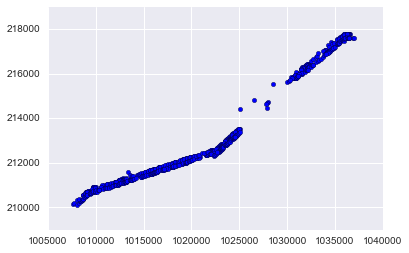

In [356]:
# Unfortunately this one passing by Citi Field breaks it and we have to stitch it back together by hand.
r_fp = filtered_pluto[filtered_pluto['Borough'] == 'Queens']
r_fp = r_fp[r_fp['Address'].map(lambda a: 'ROOSEVELT AVENUE' in a)]
plt.scatter(r_fp['XCoord'], r_fp['YCoord'])
plt.figure(figsize=(24,10))
r_fp_1 = r_fp[r_fp['XCoord'] < 1027500]
r_fp_2 = r_fp[r_fp['XCoord'] > 1027500]
r_1 = generate(r_fp_1, pnyc, 'ROOSEVELT AVENUE', n=10)
r_2 = generate(r_fp_2, pnyc, 'ROOSEVELT AVENUE', n=10)
r = np.concatenate((r_1, r_2))
distance(r)

In [227]:
linden = generate(filtered_pluto[(filtered_pluto['Borough'] == 'Brooklyn') | (filtered_pluto['Borough'] == 'Queens')], pnyc, 'LINDEN BOULEVARD', n=10)
distance(linden)

5.615761708089496

`[('BROADWAY', 13.39365218491976),
 ('BEDFORD AVENUE', 10.043175012861152),
 ('AMBOY ROAD', 8.649588344113383),
 ('79 STREET', 8.366272940780163),
 ('JAMAICA AVENUE', 7.961285770262052),
 ('NOSTRAND AVENUE', 7.927856961224874),
 ('HILLSIDE AVENUE', 7.575319053362925),
 ('FLATBUSH AVENUE', 7.5232131688738875),
 ('WHITE PLAINS ROAD', 7.195363392366333),
 ('217 STREET', 7.069577880808121),
 ('164 STREET', 6.687633688914942),
 ('2 AVENUE', 6.286779993915905),
 ('212 STREET', 6.136215113767889),
 ('215 STREET', 6.082697254556387),
 ('3 AVENUE', 5.86697080130451),
 ('4 AVENUE', 5.8177411861298385),
 ('FRANCIS LEWIS BLVD', 5.758565887479426),
 ('5 AVENUE', 5.416673889340933),
 ('LIBERTY AVENUE', 5.415613432903388),
 ('AVENUE M', 5.169249226340137),
 ('CONEY ISLAND AVENUE', 5.129221933341334),
 ('80 STREET', 5.01107815038326),
 ('AVENUE L', 4.971776823553888),
 ('PACIFIC STREET', 4.95223830282376),
 ('EAST 21 STREET', 4.802257303992538),
 ('EAST 7 STREET', 4.702653457866162),
 ('DEAN STREET', 4.693107789881555),
 ('BERGEN STREET', 4.6572633608813865),
 ('83 STREET', 4.560065938478973),
 ('EAST 2 STREET', 4.545103422286006),
 ('EAST 28 STREET', 4.397888984267488),
 ('EAST 3 STREET', 4.390069591247642),
 ('SCHENECTADY AVENUE', 4.318595269590123),
 ('SPRINGFIELD BLVD', 4.28452673095144),
 ('EAST 4 STREET', 4.284325132606896),
 ('EAST 29 STREET', 4.228708901007714),
 ('NORTHERN BOULEVARD', 4.198925848759947),
 ('EAST 22 STREET', 4.195639371177959),
 ('EAST 26 STREET', 4.179959409824905),
 ('EAST 23 STREET', 4.154160727158574),
 ('EAST 8 STREET', 3.8553907689940465),
 ('EAST 38 STREET', 3.695412558391581),
 ('GREENE AVENUE', 3.6261645894132695),
 ('ST MARKS AVENUE', 3.618790385316423),
 ('EAST 37 STREET', 3.597438459634488),
 ('EAST 35 STREET', 3.5581033124518413),
 ('EAST 52 STREET', 3.504312205638157),
 ('EAST 34 STREET', 3.502120342878594),
 ('82 STREET', 3.4732976318406052),
 ('PARK PLACE', 3.4025455980812294),
 ('89 STREET', 3.3884440319723095),
 ('EAST 51 STREET', 3.353665757022993),
 ('79 STREET', 3.3178334925876087),
 ('43 AVENUE', 3.31579470941955),
 ('BAY RIDGE AVENUE', 3.2702395979790415),
 ('78 STREET', 3.270126653208829),
 ('72 STREET', 3.222464168463467),
 ('60 STREET', 3.221227072313437),
 ('PUTNAM AVENUE', 3.16596180507857),
 ('BAY RIDGE PARKWAY', 3.129315070154086),
 ('77 STREET', 3.1015094994939263),
 ('76 STREET', 3.0395063130469784),
 ('98 STREET', 3.0234777567977433),
 ('JEFFERSON AVENUE', 2.980693275673269),
 ('6 AVENUE', 2.9362128570448855),
 ('HANCOCK STREET', 2.9178106611424472),
 ('HALSEY STREET', 2.8278008957354213),
 ('167 STREET', 2.730382954274632),
 ('208 STREET', 2.702371437534163),
 ('92 STREET', 2.4424350325709803),
 ('DECATUR STREET', 2.3976937814482904),
 ('97 STREET', 2.377865186090222),
 ('78 STREET', 2.2971608203027905),
 ('76 STREET', 2.291791691321105),
 ('168 STREET', 2.219772240046275),
 ('201 STREET', 2.21744943702528),
 ('77 STREET', 2.183411793903968),
 ('81 STREET', 2.173851361808705),
 ('202 STREET', 2.1691673745508857),
 ('88 STREET', 2.1588532198789796),
 ('204 STREET', 2.1472504030745667),
 ('75 STREET', 2.0521386230168277),
 ('UNION STREET', 2.0347947290621375),
 ('87 STREET', 2.004129428755838),
 ('PRESIDENT STREET', 1.984772194938732),
 ('CARROLL STREET', 1.9846744078632306),
 ('HYLAN BOULEVARD', 1.5981029313757253),
 ('96 STREET', 1.56575436698087),
 ('85 STREET', 1.4320834188612876),
 ('86 STREET', 1.4262606474678632),
 ('84 STREET', 1.2318119117009598),
 ('222 STREET', 0.8388034249984085),
 ('160 STREET', 0.6712647732394805),
 ('126 STREET', 0.48495163799771335),
 ('125 STREET', 0.4583419228144526),
 ('ATLANTIC AVENUE', 0.38951372102194276),
 ('166 STREET', 0.12302839097826306),
 ('FULTON STREET', 0.07443273063211611)]`

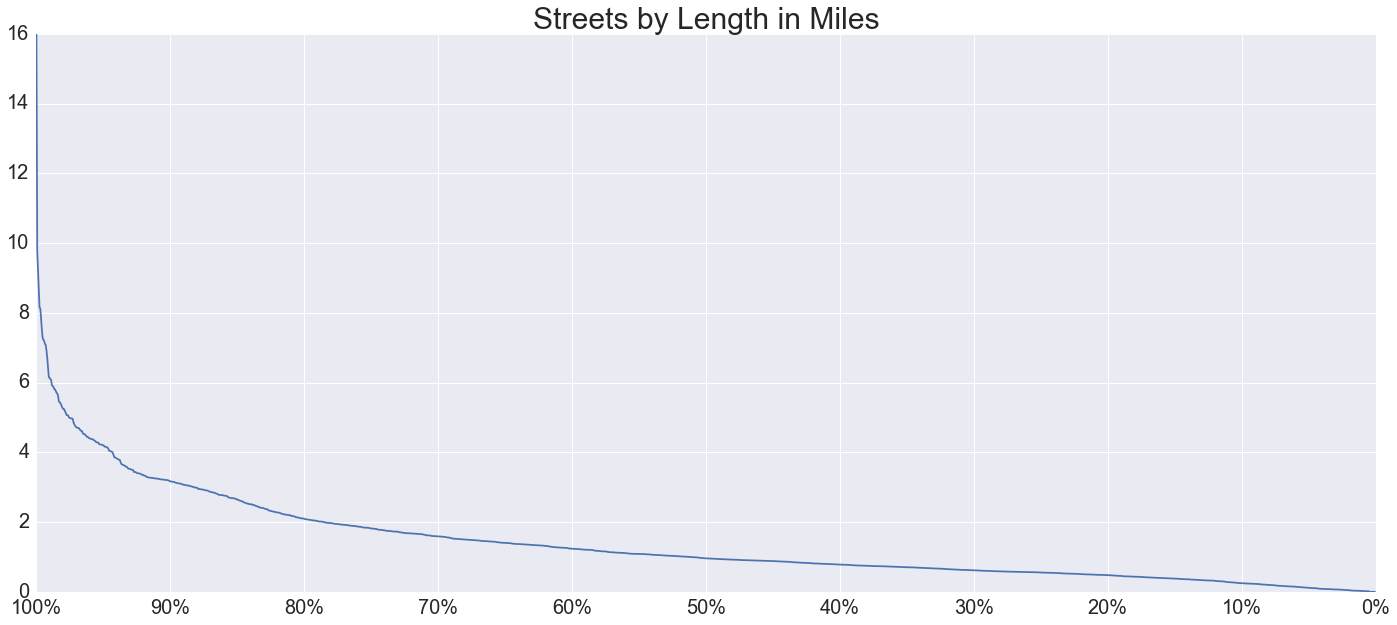

In [312]:
c_sbl_p = c_sbl.copy()
c_sbl_p['BROADWAY'] = 16
c_sbl_p.sort_values(inplace=True, ascending=False)
ax = c_sbl_p.plot(figsize=(24, 10), fontsize=20)
ax.set_xticks(np.linspace(1, 0, 11) * len(c_sbl_p))
ax.set_xticklabels([str(int(a)) + "%" for a in np.linspace(0, 100, 11)], fontsize=20) #, ha='right', rotation=45)
ax.set_title("Streets by Length in Miles", fontsize=30)

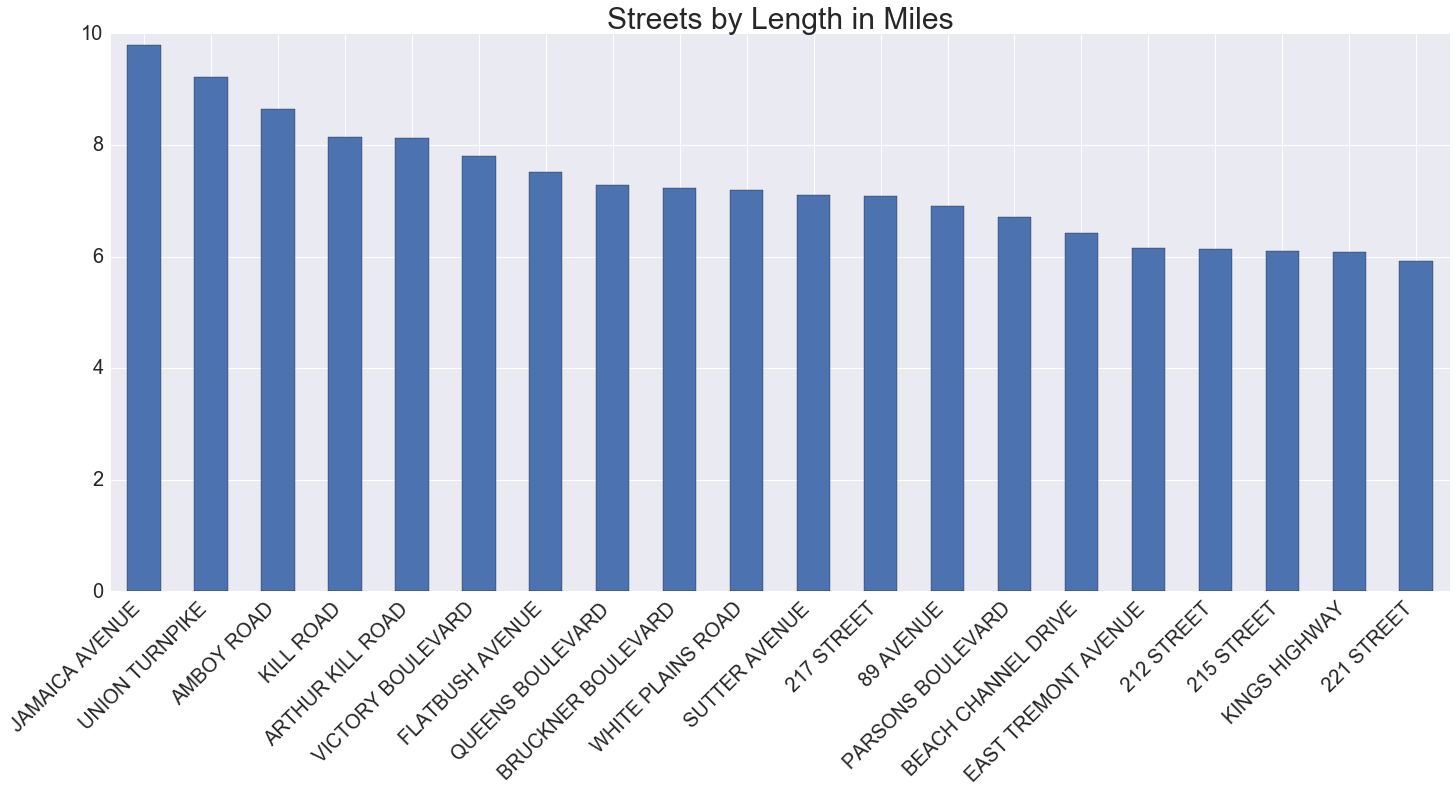

In [291]:
# INACCURATE!
ax = c_sbl[:20].plot(kind='bar', figsize=(24, 10), fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, ha='right', rotation=45)
ax.set_title("Streets by Length in Miles", fontsize=30)

In [ ]:
list(c_sbl[:20].index)

In [422]:
distances = [distance(top_10_map[name]) for name in top_10_map.keys()]

In [400]:
from collections import OrderedDict

In [424]:
top_10_map = OrderedDict([
        ('BROADWAY', broadway),
        ('NORTHERN BOULEVARD', northern),
        ('ATLANTIC AVENUE', atlantic_avenue),
        ('BEDFORD AVENUE', bedford),
        ('JAMAICA AVENUE', jamaica),
        ('UNION TURNPIKE', union),
        ('AMBOY ROAD', amboy),
        ('KILL ROAD', kill),
        ('NOSTRAND AVENUE', nostrand),
        ('LIBERTY AVENUE', liberty),
#         ('VICTORY BOULEVARD', victory),
#         ('HILLSIDE AVENUE', hillside)
    ])

features = []

for (street, dist) in zip(top_10_map.keys(), distances):
    geom = geojson.LineString(top_10_map[street].tolist())
    features.append(geojson.Feature(geometry=geom, properties={'name': street, 'distance': dist}))

with open('streets.geojson', 'w') as file:
    file.write(geojson.dumps(geojson.FeatureCollection(features), sort_keys=True))

In [410]:
%ls

_map.html
_tmp_.dat
address-data-visualization.ipynb
both-tabs-and-commas-screencap.png
data-munging.ipynb
descriptions.json
final-data-visualization.ipynb
final-visualization.html
geojson/
land-use-data-visualization.ipynb
largest_private_landowners.p
most_enumerate_private_landowners.p
most_heavily_addressed_streets_per_borough.png
nyc.json
nyc_pluto.csv*
ownership-data-visualization.ipynb
road.html
rolling-sales-data-excel-screencap.png
street-length-visualization.ipynb
streets.geojson
test.html
wealthiest_private_landowners.p


In [ ]:
# features = []

# for street, distance in zip(list(c_sbl[:20].index), list(c_sbl[:20].values)):
#     geom = geojson.LineString(generate(filtered_pluto, pnyc, street, n=10).tolist())
#     features.append(geojson.Feature(geometry=geom, properties={'name': street, 'distance': distance}))

# with open('streets.geojson', 'w') as file:
#     file.write(geojson.dumps(geojson.FeatureCollection(features), sort_keys=True))

If you're interested in Manhattan addressing&mdash;questions like where are the low numbers, where are the high numbers, and how are address numbers distributed throughout&mdash;Ben Wellington of IQuantNY published [an excellent analysis on the subject](http://iquantny.tumblr.com/post/102509139169/colorfully-decoding-manhattans-address-system) a few years ago which is worth reading. The conclusions there ought to extend to greater New York City, so I won't reiterate them myself&mdash;read it!

In [ ]:
number_tokens = Counter()

for words in tqdm([address.split(' ')[:1] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    number_tokens.update(words)

In [ ]:
# Not useful! This is probably an error: ought to be "150 123 Street" perhaps?

def is_number(n):
    try:
        int(n)
    except ValueError:
        return False
    return True

np.max([int(num) for num, value in number_tokens.items() if is_number(num)])

One final surprise result: though both rank highly in usage, `West` is three times as popular in New York City addresses as `East` is. `North` and `South`, by contrast, are nowhere to be found.

In [ ]:
address_tokens = Counter()

for words in tqdm([address.split(' ') for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    address_tokens.update(words)

In [ ]:
ax = pd.Series({token.title(): address_tokens[token] for token in ['NORTH', 'SOUTH', 'EAST', 'WEST']}).sort_values(ascending=False).plot(kind='bar', figsize=(24, 10), fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, ha='center', rotation=0)
ax.set_title("Directional Address Ending Occurances", fontsize=30)

In [ ]:
east_coords = pluto[pluto['Address'].map(lambda x: 'EAST' in str(x))][['XCoord', 'YCoord']].dropna()
plt.scatter(east_coords['XCoord'], east_coords['YCoord'])

In [ ]:
east_coords = pluto[pluto['Address'].map(lambda x: 'WEST' in str(x))][['XCoord', 'YCoord']].dropna()
plt.scatter(east_coords['XCoord'], east_coords['YCoord'])

In [ ]:
ownership_by_type = pluto['OwnerType'].value_counts(dropna=False)
ownership_by_type['P'] += ownership_by_type[ownership_by_type.isnull().values[0]]
ownership_by_type = ownership_by_type[1:]
ownership_type_map = {  'P': 'Private',
                        'C': 'Public',
                        'M': 'Mixed',
                        'O': 'Public',
                        'X': 'Mixed'
                     }
ownership_by_type.index = [ownership_type_map[x] for x in ownership_by_type.index]
ownership_by_type = ownership_by_type.groupby([ownership_by_type.index]).sum().sort_values(ascending=False)
ownership_by_type = ownership_by_type.map(lambda x: x / 859464 * 100)
ownership_by_type.name = '%'
ownership_by_type.index.name = 'Use'

In [ ]:
PrettyPandas(ownership_by_type).total()

In [ ]:
codes = {1: 'One/Two-Family',
         2: 'Multi-Family Walkup',
         3: 'Multi-Family Elevator',
         4: 'Mixed Residential/Commercial',
         5: 'Commercial/Office',
         6: 'Industrial',
         7: 'Transport/Utility',
         8: 'Public Facility',
         9: 'Open/Green Space',
         10: 'Parking Lot',
         11: 'Vacant'}

land_use_data = pluto['LandUse'][pluto['LandUse'].notnull()].map(lambda x: codes[x]).value_counts()

In [ ]:
land_use_data.plot(kind='bar')

*Break this down by value and building area too!*